# Exploratory Data Analyses: Titanic Survival Dataset


**GOAL**: The goal of this challenge is to predict the passengers who survived the Titanic shipwreck. <br/>

So our goal is to build a predictive model using the various characteristics of a passenger i.e. age, gender, socio-economic status, ticket details etc

[Kaggle Challenge webpage](https://www.kaggle.com/c/titanic/overview)

## Data Description:
![](references/Titanic_descr.png)


**Variable Notes** <br/>
**pclass**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

**Sibling** = brother, sister, stepbrother, stepsister

**Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

**Parent** = mother, father

**Child** = daughter, son, stepdaughter, stepson <br/>
Some children travelled only with a nanny, therefore parch=0 for them.

## Import the required libraries

In [1]:
# Data analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno # missing data

## Load in the dataset

In [2]:
df = pd.read_csv("../data/raw/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Things we can identify from the **df.info** method:
1. The number of non-null entries in each column
2. the datatype of each column, and the frequency of each datatype
3. The number of rows, index type and the number of columns
4. memory usage: also try "deep" option

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Overly complicated way of printing the number of rows and columns
list(map(lambda l: print(f"The number of {l[0]} are {l[1]}"),  
         zip(["rows", "columns"], df.shape)));

The number of rows are 891
The number of columns are 12


In [5]:
# Candidate of automatic report generator
# print rows and columns

def print_row_columns(df):
    nrow, ncol = df.shape
    print(f'The number of rows are {nrow}')
    print(f'The number of columns are {ncol}')
    
    return nrow, ncol

In [6]:
nrow, ncol = print_row_columns(df)

The number of rows are 891
The number of columns are 12


## Frame the basic analyses we can do

1. Look at the datatypes of each column and ascertain if<br/>
    1.1. we need to change the datatype <br/>
    1.2. we need to perform some encoding like OneHotEncoding
    
2. Check if there is a space or any discrepancy in column names and if they can be renamed?
3. Check and visualize the missing values in each column <br/>
    3.1. Remove the missing values or, <br/>
    3.2. A strategy to impute the missing values
   

### Let's look at the missing values

**Age** has 17% and **Cabin** has 77% missing values

In [7]:
miss_prop = df.isna().sum()/nrow
miss_prop

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
def plot_missprop(df):
    miss_prop = df.isna().mean()
    fig, ax = plt.subplots(figsize=(12, 8))
    miss_prop.plot(kind="bar", ax=ax)
    ax.set_title("Missing Proportions", fontdict=dict(size=20, weight="bold"))
    
    return(miss_prop)

**Age** has \~20% and **Cabin** has 77% missing values

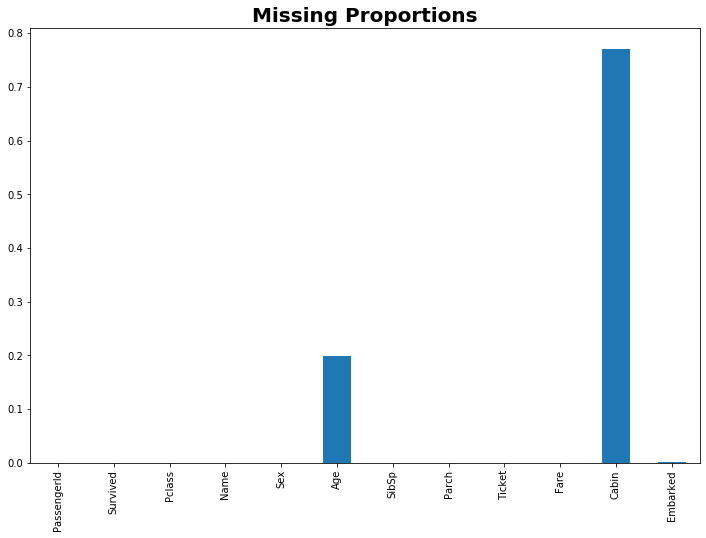

In [12]:
plot_missprop(df);

Look at the missing values using the visualization from the missingno library <br/>
Here also we can see Age and Cabin having substantial amount of missing values, and very little is missing in Embarked

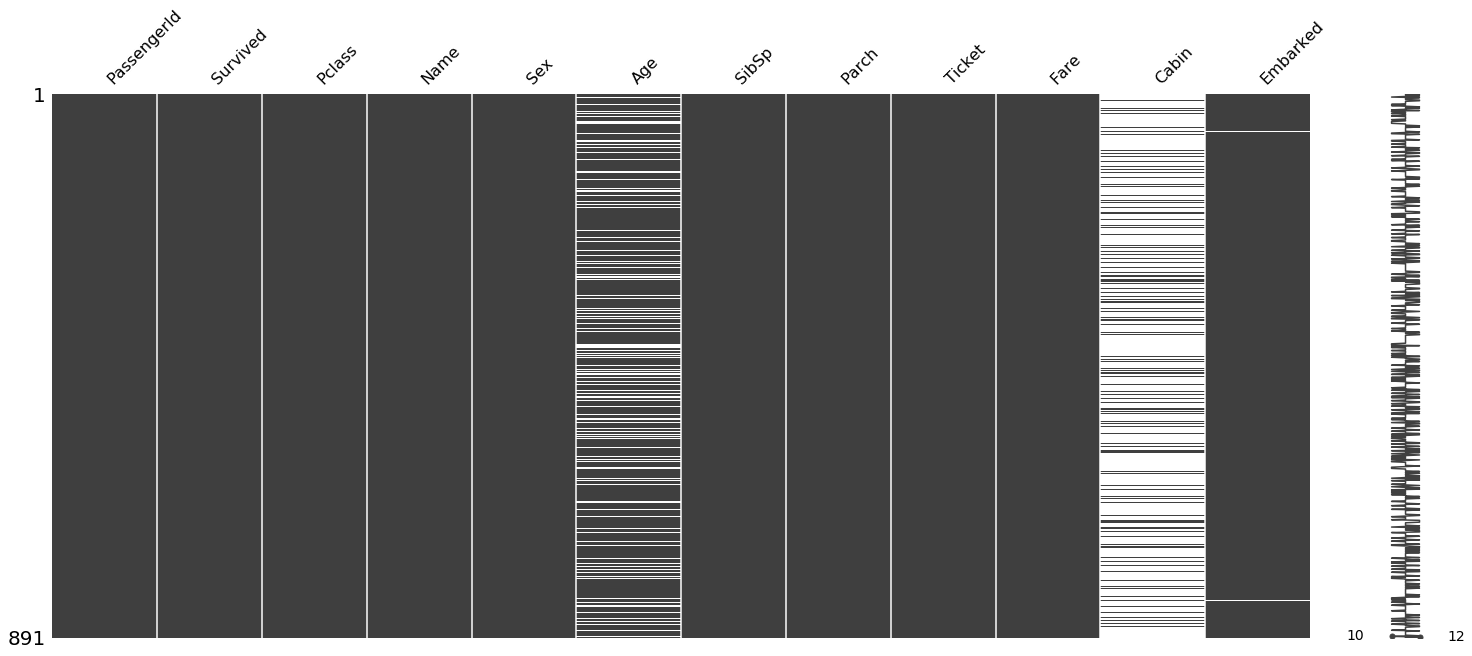

In [13]:
missingno.matrix(df)

In [14]:
actual_prop = 1 - miss_prop

### Look at the datatypes of each

In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Basically the lower the unique proportion, more confident we are to treat it as a categorical variable but with a <br/> 
**CAUTION**: Check if it actually is a ordinal variable so that we don't accidently apply OneHotEncoding.

In [16]:
def get_unique(df, prop=False):
    if prop:
        return df.apply(lambda x: x.nunique()/(actual_prop[x.name]*nrow), "index")
    else:
        return df.apply(lambda x: x.nunique(), "index")

1. Looks like **PassengerId**, **Name**, **Ticket** are categorical but way too many categories in the raw form, maybe we can perform some text-analytics to lower extract a pattern and group certain categories?
2. **Survived** is definitely categorical and that is infact what we want to predict
3. We can apply OneHotEncoding directly to **Sex**, **Embarked**
4. Should We apply OneHotEncoding to **Pclass** given that it can be treated as an ordinal variable as well?
5. **Cabin** is also a categorical variable and we may apply OneHotEncoding directly or we may try to club certain categories using some text analytics as the unique proportion is a bit high, but there are also a lot of missing values so we need to see it's usefulness
6. Note that **Age** and **Fare** are obviously a continous variable but we can try to convert them to ordinal categorical and see if our accuracy improves
7. **SibSp** and **Parch** are already ordinal categorical

In [17]:
get_unique(df, prop=True)

PassengerId    1.000000
Survived       0.002245
Pclass         0.003367
Name           1.000000
Sex            0.002245
Age            0.123249
SibSp          0.007856
Parch          0.007856
Ticket         0.764310
Fare           0.278339
Cabin          0.720588
Embarked       0.003375
dtype: float64

### Target variable: Survived

Survived: 1 for yes, 0 for no <br/>
This is the variable we are trying to predict

Let's see how many passengers survived. <br/>
So we have an **Imbalanced dataset**, maybe we can exploit some imbalanced learning algorithms.<br/>
Try looking into [imbalanced-learn](t.ly/bWSU)

The number of passengers who survived:
0    549
1    342
Name: Survived, dtype: int64

The proportion of passengers who survived:
0    0.616162
1    0.383838
Name: Survived, dtype: float64



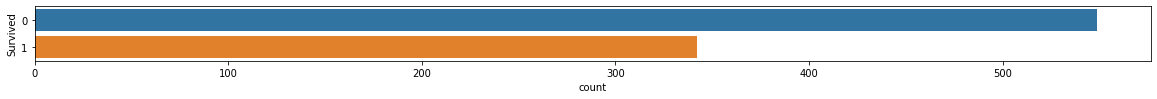

In [18]:
fig = plt.figure(figsize=(20, 1))
sns.countplot(y='Survived', data=df)
print("The number of passengers who survived:\n", 
      df.Survived.value_counts(), "\n", sep="")
print("The proportion of passengers who survived:\n", 
      df.Survived.value_counts(normalize=True), "\n", sep="")


In [19]:
import random
import string

def randString(length=5):
    letters = string.ascii_lowercase + string.ascii_uppercase + string.digits
    return ''.join((random.choice(letters) for i in range(length)))

In [20]:
randString(5)

'd9JaO'

In [21]:
def plot_count(series, dropna=False):
    val_cnts = series.value_counts(dropna=dropna)
    fig = plt.figure(figsize=(20, 1))
    
    if not dropna:
        try:
            series = series.fillna('NaN')
        except ValueError: # fill value must be in category error
            pass
        
    g = sns.countplot(y=series)
    
    print("The frequency of each category:\n", 
          val_cnts, "\n", sep="")
    print("The proportion of each category:\n", 
          val_cnts/series.size, "\n", sep="")
    
    return g

**So these are the possible approaches we can try:**
1. Discretize certain continuous variables into bins:<br/>
    1.1. df_bin for binned version<br/>
    1.2. df_con for continuous version<br/>
    1.3. maybe try a mix of them and also how many bins to keep<br/>
2. Impute missing values or discard them
3. Try imbalanced learning algorithms

### Feature exploration

1. Look at the distribution of each variable
2. Look at how each variable relates to the target variable
3. Look at how one variable interacts with another variable <br/>
    3.1. In case of continuous variable this may involve binning

#### Pclass
A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower


Let's see how the three categories are distributed:

So we have the highest percentage of Lower class (\~55%), then Upper class (\~24%) and then Lower Class (~20%)


The frequency of each category:
3    491
1    216
2    184
Name: Pclass, dtype: int64

The proportion of each category:
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64



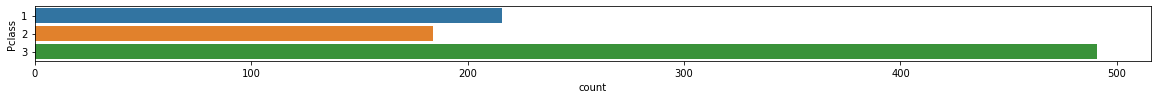

In [22]:
plot_count(df['Pclass']);

Let's see the survival probability accross the three classes. 
 - The highest chances of survival are in Pclass 1 (lower class), followed by 2 and then lowest in 3

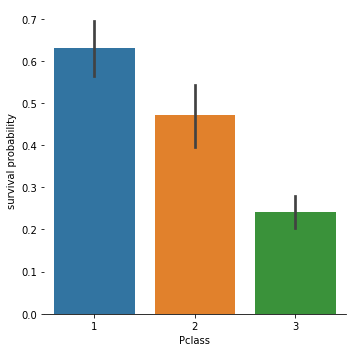

In [23]:
g = sns.catplot(x='Pclass', y='Survived', kind='bar', data=df)
g.despine(left=True)
g.set_ylabels('survival probability');

In [24]:
def plot_prob(x, y, data=None):
    if data is None:
        data = pd.concat([x, y], axis=1)
        x, y = data.columns
        data = data.dropna()
    
    
    g = sns.catplot(x, y, kind='bar', data=data)
    g.despine(left=True)
    g.set_ylabels(f'{y} probability')
    
    return g

#### Sex

See the counts of both Male and Female <br/>
So we have way more Males (\~ 65%) than females (\~ 35%)

The frequency of each category:
male      577
female    314
Name: Sex, dtype: int64

The proportion of each category:
male      0.647587
female    0.352413
Name: Sex, dtype: float64



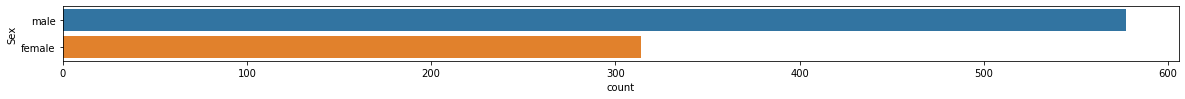

In [25]:
plot_count(df['Sex'])

Let's see the survival probability for both the genders <br/>
emales have way more chance of surviving (~ 75%) than the males (~ 19%).

**NOTE**: This is conditional probability. So my predictive model could be , if it is a Female predict Survival with 0.74 probability and if is a male predict Survival with 0.19 probability


In [26]:
df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

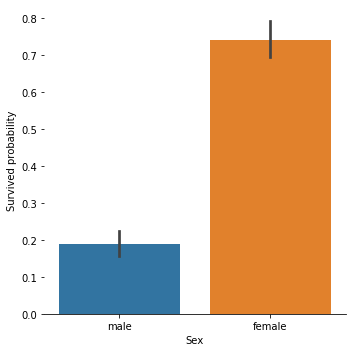

In [27]:
plot_prob('Sex', 'Survived', df);

#### SibSp

\# of Siblings/Spouses aboard the Titanic

Let's see the counts:
1. Most people don't have any siblings/spouses aboard
2. This is followed by 1 sibling/spouse
3. Then finally 4,3,8,5

The frequency of each category:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

The proportion of each category:
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64



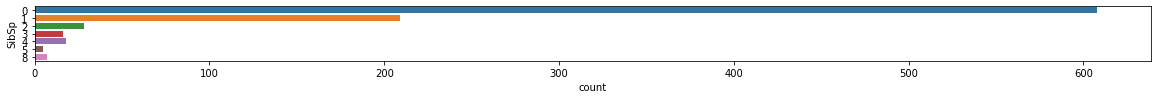

In [28]:
plot_count(df['SibSp'])

We can maybe look at grouping the categories as 0, 1, and >1 since there are very few in higher number category

Let's look at how the survival probability varies. <br/>
See how highly variable the estimates are in the higher categories because of a small sample size.

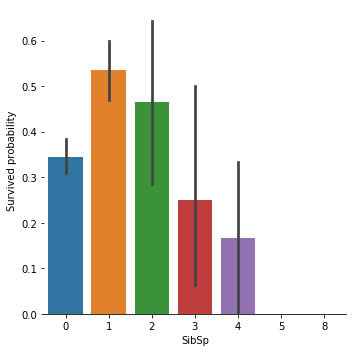

In [29]:
plot_prob('SibSp', 'Survived', df)

Let's group the categories as 0, 1 and >1, we can compare the performance in both the scenarios. <br/>
The idea is to create a separate pipeline for each type of analysis I can think

In [30]:
def FE_SibSp(series, bins=[0, 1]):
    bins_arg = bins + [bins[-1] + 1, series.max()+1]
    res = pd.cut(series, bins_arg, right=False)
    res.cat.categories = bins + [f'>{bins[-1]}']
    # NOTE: Use df.SibSp.cat.codes to access the numeric codes 
    
    return res

In [31]:
# As a good practice should I keep the original df intact?
# USE ONLY ONCE
SibSp = FE_SibSp(df.SibSp)

In [32]:
# Verify that the '>1' code is indeed coded as 2, so in the final model building process we can pass it like this
(SibSp.cat.codes[SibSp == '>1'] == 2).all()

True

The frequency of each category:
0     608
1     209
>1     74
Name: SibSp, dtype: int64

The proportion of each category:
0     0.682379
1     0.234568
>1    0.083053
Name: SibSp, dtype: float64



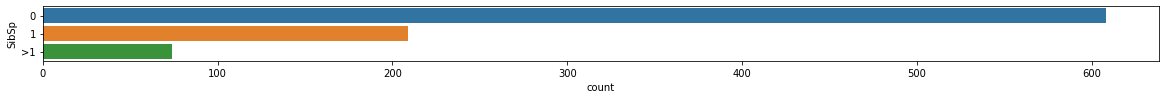

In [33]:
plot_count(SibSp);

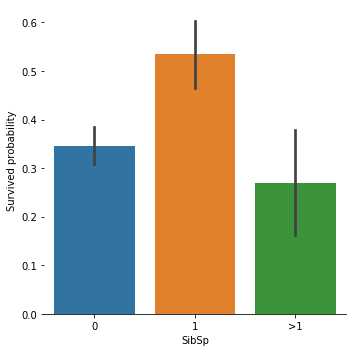

In [34]:
plot_prob(SibSp, df.Survived);

#### Parch
\# of parents/children aboard the Titanic

Let's see the counts:
1. Majority people have no Parents or children i.e. this hints that the most of the age group is around the 20-30s who are a bunch of young people travelling solo or with their friends
2. Again higher categories have very few number of people, and we can club these groups together to form 0, 1, >1

The frequency of each category:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

The proportion of each category:
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64



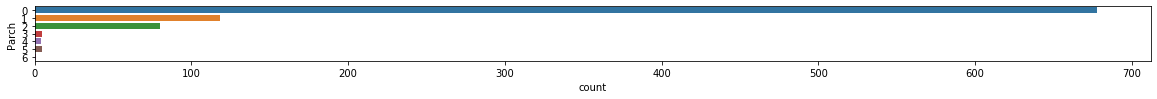

In [35]:
plot_count(df['Parch'])

In [36]:
def FE_Parch(series, bins=[0, 1]):
    bins_arg = bins + [bins[-1] + 1, series.max()+1]
    res = pd.cut(series, bins_arg, right=False)
    res.cat.categories = bins + [f'>{bins[-1]}']
    # NOTE: Use df.SibSp.cat.codes to access the numeric codes 
    
    return res

In [37]:
Parch = FE_Parch(df.Parch, [0, 1])
Parch

0       0
1       0
2       0
3       0
4       0
       ..
886     0
887     0
888    >1
889     0
890     0
Name: Parch, Length: 891, dtype: category
Categories (3, object): [0 < 1 < >1]

The frequency of each category:
0     678
1     118
>1     95
Name: Parch, dtype: int64

The proportion of each category:
0     0.760943
1     0.132435
>1    0.106622
Name: Parch, dtype: float64



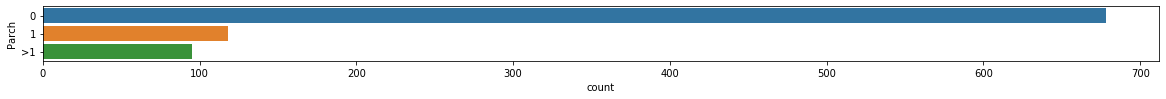

In [38]:
plot_count(Parch);

So the survival is lowest when the person has 0 parent or children, and highest when they have 1 children

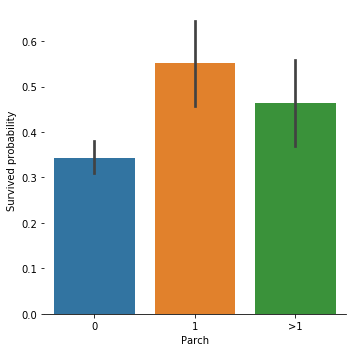

In [39]:
plot_prob(Parch, df.Survived);

#### Age

Let's visualize the missing values in the Age column

In [40]:
miss_prop.Age

0.19865319865319866

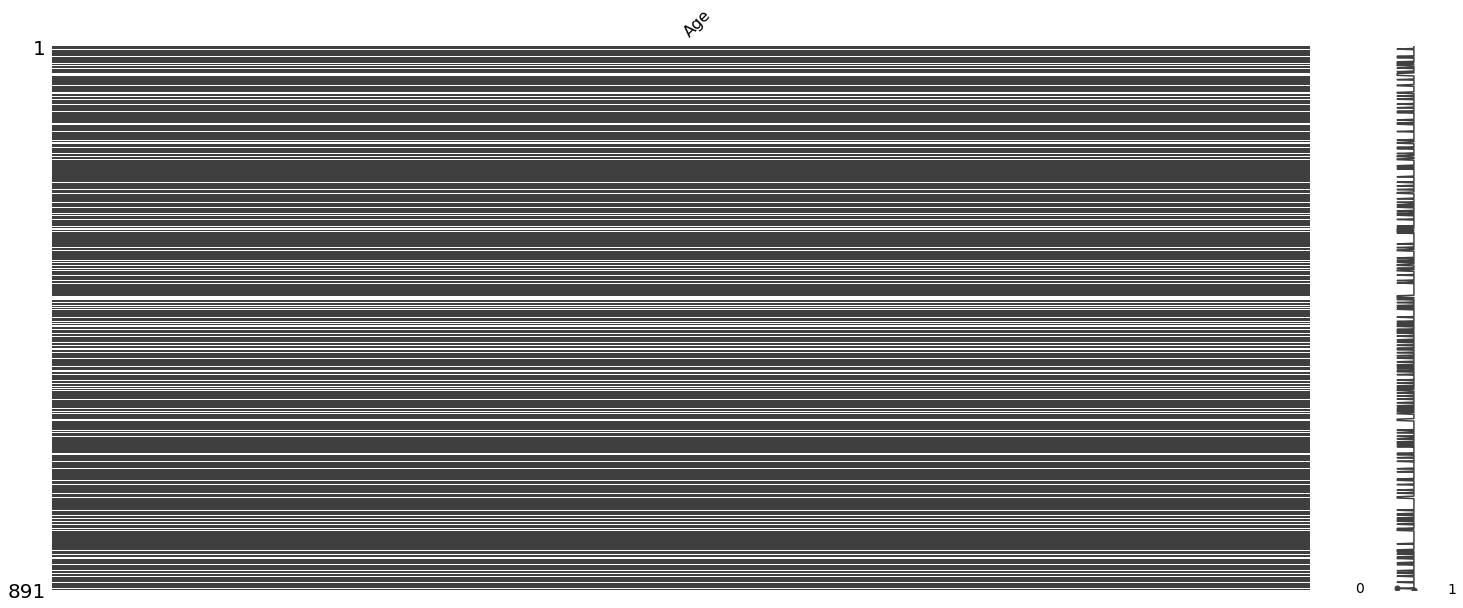

In [41]:
missingno.matrix(pd.DataFrame(df.Age))

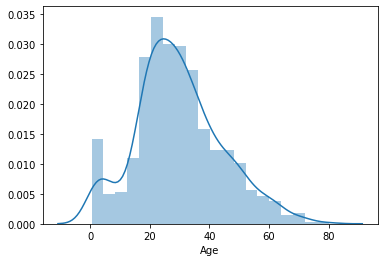

In [42]:
sns.distplot(df.Age.dropna())

Is the age distribution different for those who survived and those who didn't?<br/>

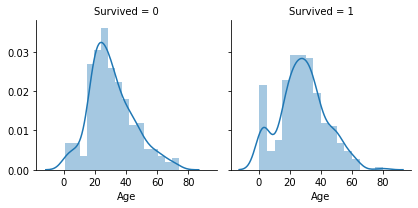

In [43]:
g = sns.FacetGrid(df, col="Survived")
g.map(sns.distplot, "Age");

There are a lot more people surviving in the younger ages, but this is hard to interpret

Let's break the age into 5 bins

In [44]:
def FE_Age(series, bins=[0, 5, 10, 15, 20, 30, 50, 100]):
    return pd.cut(series, bins, right=True)

In [45]:
Age = FE_Age(df.Age)
Age.value_counts(dropna=False)

(30.0, 50.0]     241
(20.0, 30.0]     230
NaN              177
(15.0, 20.0]      96
(50.0, 100.0]     64
(0.0, 5.0]        44
(5.0, 10.0]       20
(10.0, 15.0]      19
Name: Age, dtype: int64

The frequency of each category:
(30.0, 50.0]     241
(20.0, 30.0]     230
NaN              177
(15.0, 20.0]      96
(50.0, 100.0]     64
(0.0, 5.0]        44
(5.0, 10.0]       20
(10.0, 15.0]      19
Name: Age, dtype: int64

The proportion of each category:
(30.0, 50.0]     0.270483
(20.0, 30.0]     0.258137
NaN              0.198653
(15.0, 20.0]     0.107744
(50.0, 100.0]    0.071829
(0.0, 5.0]       0.049383
(5.0, 10.0]      0.022447
(10.0, 15.0]     0.021324
Name: Age, dtype: float64



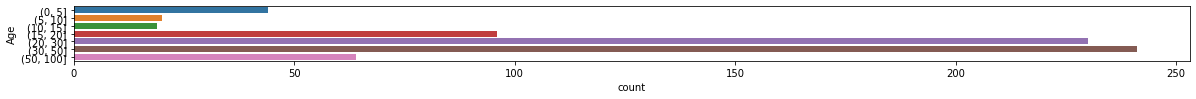

In [46]:
plot_count(Age);

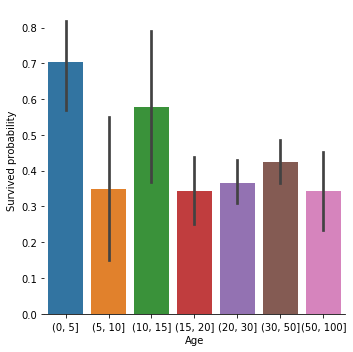

In [47]:
plot_prob(Age, df['Survived'])

The survival rate seems to be highest in the infant age group (0-5], followed by (10-15], and seems to be roughly the same for other age groups but with varying degrees of confidence. <br/>

For now I can keep it as a continuous variable, although it doesn't hurt to experiment with converting it to categorical. <br/>
Check out [Discretization with Decision Trees](https://towardsdatascience.com/discretisation-using-decision-trees-21910483fa4b)

#### Fare

Let's see the distribution of Fare

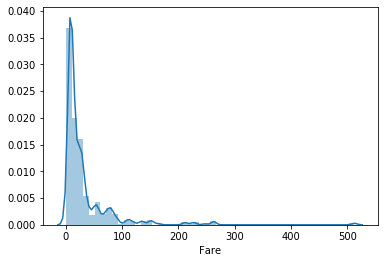

In [48]:
sns.distplot(df.Fare);

How does the distribution differ between those who Survived and those who didn't?

[How to change figuresize using seaborn](https://stackoverflow.com/questions/26163702/how-to-change-figuresize-using-seaborn-factorplot)

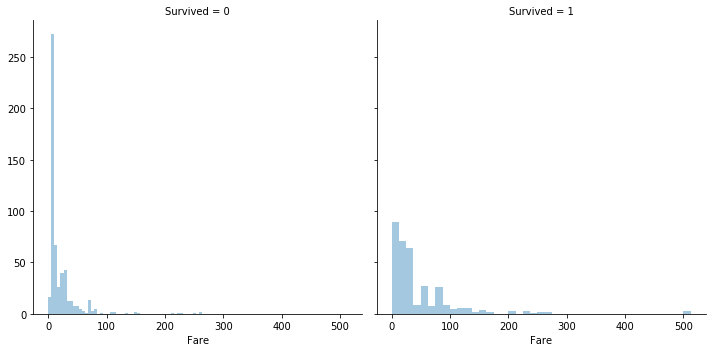

In [49]:
g = sns.FacetGrid(df, col="Survived", height=5)
g.map(sns.distplot, 'Fare', kde=False);

It seems in a certain age group in the young ages there was a high probability of dying but it's not entirely clear from here.

Looks like there are some people with 0 Fare. 

In [50]:
(df.Fare == 0).sum()

15

Every one of them was male and looks like just 1 out of 15 survived. Seems like they worked on the ship and helped the passengers first before getting themselves to safety, and hence died.

In [51]:
df.loc[df.Fare == 0, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Or I can try Discretization with Decision Trees for Fare as well

In [52]:
def FE_Fare(series, bins=[-10, 0, 50, 100, 200]):
    res = pd.cut(series, bins + [int(series.max()+1)], right=True)
    res.cat.categories = [0] + res.cat.categories.to_list()[1:]
    return res

In [53]:
Fare = FE_Fare(df.Fare, bins=[-10, 0, 10, 20, 50, 100, 200])

The frequency of each category:
(0, 10]       321
(20, 50]      216
(10, 20]      179
(50, 100]     107
(100, 200]     33
(200, 513]     20
0              15
Name: Fare, dtype: int64

The proportion of each category:
(0, 10]       0.360269
(20, 50]      0.242424
(10, 20]      0.200898
(50, 100]     0.120090
(100, 200]    0.037037
(200, 513]    0.022447
0             0.016835
Name: Fare, dtype: float64



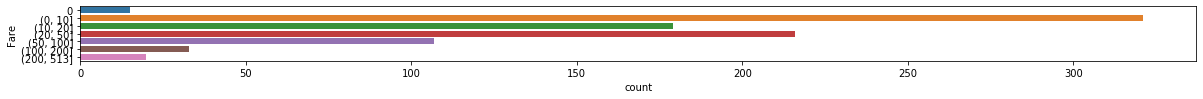

In [54]:
plot_count(Fare);

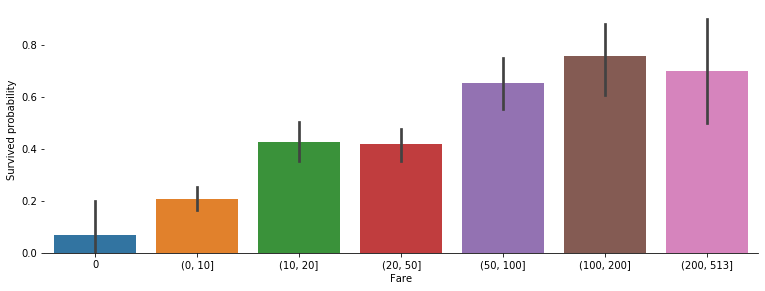

In [55]:
g = plot_prob(Fare, df['Survived'])
g.fig.set_size_inches(12, 4)

So generally higher the Fare was paid more were the chances of survival

#### Cabin

In [56]:
df.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

Let's visualize the missing values

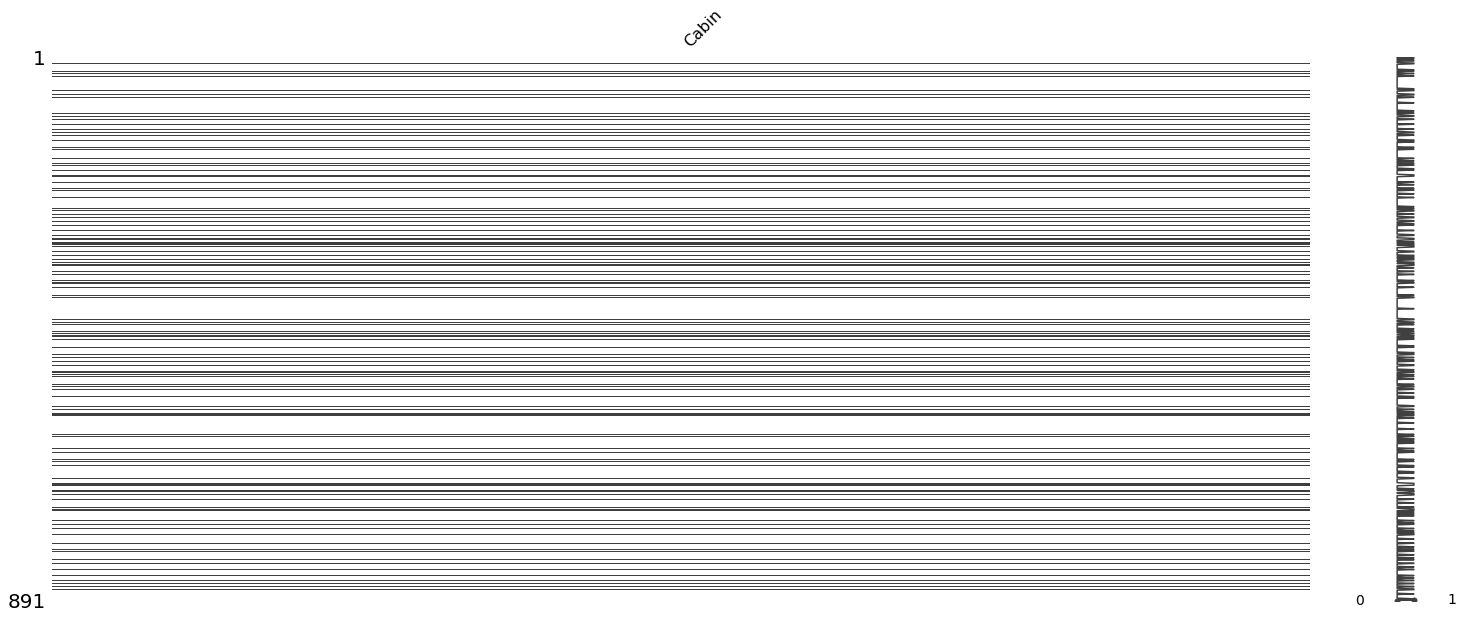

In [57]:
missingno.matrix(pd.DataFrame(df.Cabin));

The passengers having missing value for Cabin are those that didn't have a cabin, maybe making them more susceptible to not surviving?

Let's see if having a Cabin had an effect on Survival probability

In [58]:
has_Cabin = ~df.Cabin.isna()

Most passengers didn't have a Cabin

The frequency of each category:
False    687
True     204
Name: Cabin, dtype: int64

The proportion of each category:
False    0.771044
True     0.228956
Name: Cabin, dtype: float64



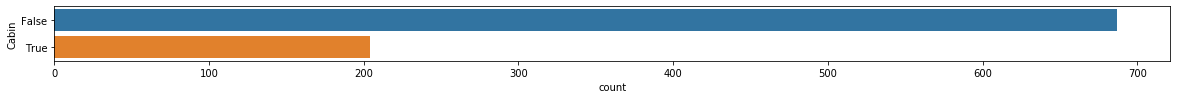

In [59]:
plot_count(has_Cabin);

Cabin
False    0.299854
True     0.666667
Name: Survived, dtype: float64


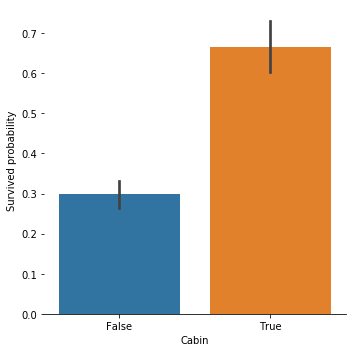

In [60]:
print(df.Survived.groupby(has_Cabin).mean())
plot_prob(has_Cabin, df.Survived);

Not having a Cabin definitely impacted the Survival Chances. Note that these are conditional probabilities, i.e. given a person has Cabin there is \~66.66% chance he survives, and given that a person does not have a Cabin there is \~30% chance of surviving (AND NOT \~(100-66.66)%)

How do the entries in the Cabin look like?

1. The entry nan corresponds to the passenger not having a Cabin
2. The first letter of the Cabin might be important, [A, B, C, D, E, F] as it corresponds to deck level
3. Some have purchased multiple Cabins? 

![](references/Titanic_Cabin_cutaway.png)

In [61]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Does Pclass roughly match with the deck levels?  Higher Deck levels corresponding to Upper class, then Middle and the lower decks to lower class?

In [62]:
cabin_class = df.Cabin.str[0].fillna('No Cabin')
cabin_class

0      No Cabin
1             C
2      No Cabin
3             C
4      No Cabin
         ...   
886    No Cabin
887           B
888    No Cabin
889           C
890    No Cabin
Name: Cabin, Length: 891, dtype: object

1. Lower class Pclass = 3 and Middle Class Pclass = 2, almost all had missing Cabin i.e. No Cabin
2. Upper class occupied mostly Cabins A to E, with A being the richest? Does the Fare correspond to Cabin?
3. However notice, that classifying the missing Cabin as No Cabin for these Upper class might be wrong.
4. Since this feature is highly Associated with Pclass, including it or not might not make a huge difference.

In [63]:
pd.crosstab(df.Pclass, cabin_class)

Cabin,A,B,C,D,E,F,G,No Cabin,T
Pclass,,,,,,,,,
1,15,47,59,29,25,0,0,40,1
2,0,0,0,4,4,8,0,168,0
3,0,0,0,0,3,5,4,479,0


It's obvious to see that these two variables are associated but still we can conduct a $\chi^2$ test of independence 

In [64]:
from scipy.stats import chi2_contingency

In [65]:
tab = pd.crosstab(df.Pclass, cabin_class)
tab.drop("T", axis=1, inplace=True)
tab

Cabin,A,B,C,D,E,F,G,No Cabin
Pclass,,,,,,,,
1,15,47,59,29,25,0,0,40
2,0,0,0,4,4,8,0,168
3,0,0,0,0,3,5,4,479


We got a very high $\chi^2_{stat} \approx 650.8$ and a very low pvalue. So definitely these two variables are associated.

In [66]:
chi2_contingency(tab.values)

(650.7819779833426,
 8.121703595150516e-130,
 14,
 array([[  3.62359551,  11.35393258,  14.25280899,   7.97191011,
           7.73033708,   3.14044944,   0.96629213, 165.96067416],
        [  3.1011236 ,   9.71685393,  12.19775281,   6.82247191,
           6.61573034,   2.68764045,   0.82696629, 142.03146067],
        [  8.2752809 ,  25.92921348,  32.5494382 ,  18.20561798,
          17.65393258,   7.17191011,   2.20674157, 379.00786517]]))

Does Higher Fare correspond to the Higher Cabin Class?

In [67]:
from pandas.api.types import CategoricalDtype
cabin_cat = CategoricalDtype(['A', 'B', 'C', 'D', 'E', 'F', 'No Cabin'], ordered=True)
cabin_class = cabin_class.astype(cabin_cat)

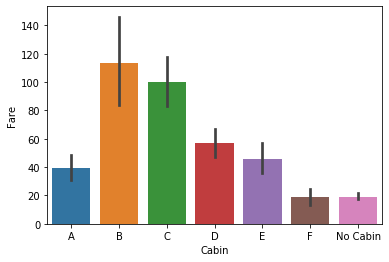

In [138]:
sns.barplot(x=cabin_class, y=df.Fare);

The Fares seem to be in the order B > C > D > E > A > No Cabin > F

The frequency of each category:
No Cabin    687
C            59
B            47
D            33
E            32
A            15
F            13
NaN           5
Name: Cabin, dtype: int64

The proportion of each category:
No Cabin    0.771044
C           0.066218
B           0.052750
D           0.037037
E           0.035915
A           0.016835
F           0.014590
NaN         0.005612
Name: Cabin, dtype: float64



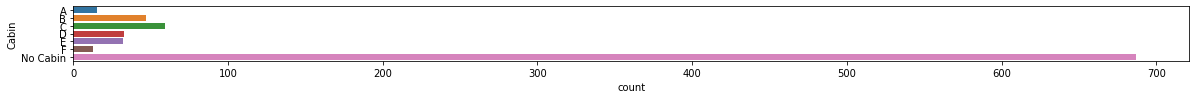

In [140]:
plot_count(cabin_class);

So most had No Cabin, followed by C, B, D, E, A, F

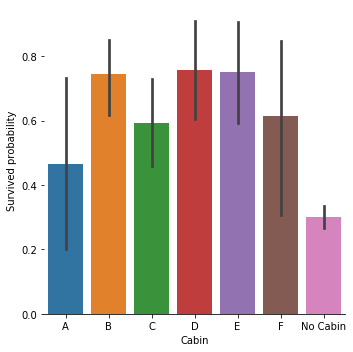

In [142]:
plot_prob(cabin_class, df.Survived);

The only thing we can definitely conclude is that passengers with No Cabin had the least Survival chances, rest of the estimates are too variable to reach a definite conclusion

#### Name

In [143]:
df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Let's extract their titles

In [146]:
import re

In [150]:
titles = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
titles

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

The frequency of each category:
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Ms            1
Countess      1
Don           1
Capt          1
Jonkheer      1
Sir           1
Mme           1
Name: Name, dtype: int64

The proportion of each category:
Mr          0.580247
Miss        0.204265
Mrs         0.140292
Master      0.044893
Dr          0.007856
Rev         0.006734
Col         0.002245
Mlle        0.002245
Major       0.002245
Lady        0.001122
Ms          0.001122
Countess    0.001122
Don         0.001122
Capt        0.001122
Jonkheer    0.001122
Sir         0.001122
Mme         0.001122
Name: Name, dtype: float64



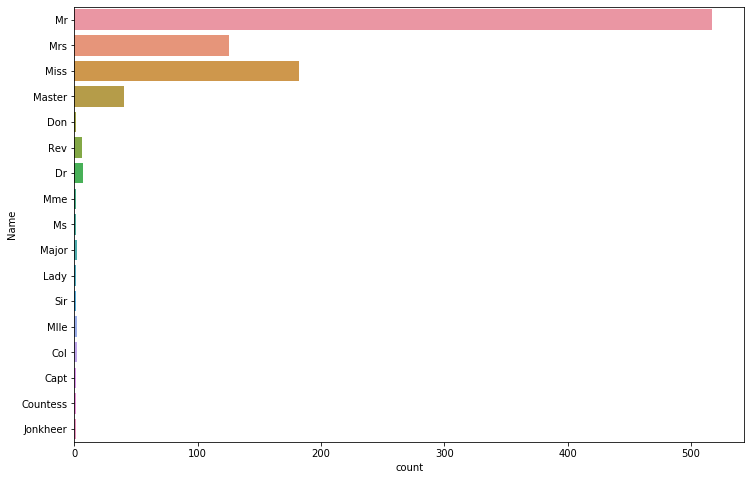

In [155]:
g = plot_count(titles)
g.figure.set_size_inches(12, 8)

1. Rename [Mlle, Ms] -> Miss
2. Rename [Mme] -> Mrs
3. Put the Rest -> Special

In [159]:
titles.replace(['Mlle', 'Ms'], 'Miss', inplace=True)
titles.replace(['Mme'], 'Mrs', inplace=True)

In [160]:
titles

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [165]:
titles.loc[~titles.isin(['Mr', 'Mrs', 'Miss', 'Master'])] = 'Special'

The frequency of each category:
Mr         517
Miss       185
Mrs        126
Master      40
Special     23
Name: Name, dtype: int64

The proportion of each category:
Mr         0.580247
Miss       0.207632
Mrs        0.141414
Master     0.044893
Special    0.025814
Name: Name, dtype: float64



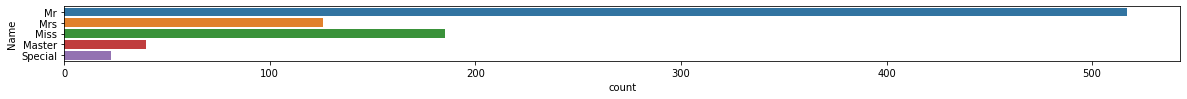

In [167]:
plot_count(titles);

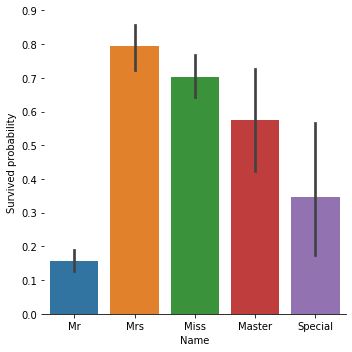

In [170]:
plot_prob(titles, df.Survived);

Mr survival chances are very low, Females (Mrs, Miss) had the highest survival chances, followed by Master then Special

#### Embarked

In [194]:
df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

The frequency of each category:
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

The proportion of each category:
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: Embarked, dtype: float64



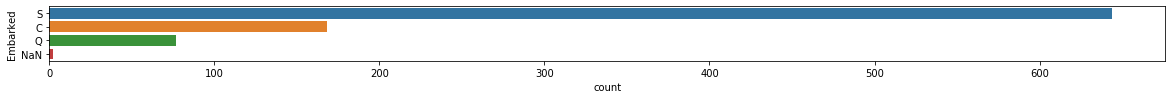

In [195]:
plot_count(df.Embarked);

Most Embarked at Port S, then C, then Q

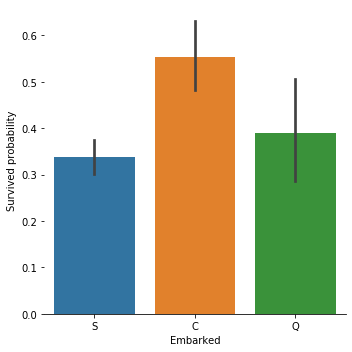

In [200]:
plot_prob('Embarked', 'Survived', df);

Highest probability of survival was for Port C, then Port Q, then Port S

#### Ticket

In [210]:
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [214]:
ticket_type = df.Ticket.str.strip().str.split(' ').str[0]


In [217]:
ticket_type.loc[ticket_type.str.isdigit()] = 'other'

In [221]:
ticket_type = ticket_type.str.replace(r'\.', '')
ticket_type

0          A/5
1           PC
2      STON/O2
3        other
4        other
        ...   
886      other
887      other
888        W/C
889      other
890      other
Name: Ticket, Length: 891, dtype: object

In [225]:
ticket_type = ticket_type.str.upper()


The frequency of each category:
OTHER       661
PC           60
CA           41
A/5          19
SOTON/OQ     15
STON/O       12
SC/PARIS     11
W/C          10
A/4           6
STON/O2       6
SOC           5
FCC           5
C             5
LINE          4
SC/AH         3
SO/PP         3
PP            3
SOTON/O2      2
WE/P          2
A5            2
SW/PP         2
P/PP          2
WEP           1
CA/SOTON      1
SC/A4         1
FA            1
A4            1
FC            1
SC            1
SO/C          1
A/S           1
SOP           1
SCO/W         1
SP            1
Name: Ticket, dtype: int64

The proportion of each category:
OTHER       0.741863
PC          0.067340
CA          0.046016
A/5         0.021324
SOTON/OQ    0.016835
STON/O      0.013468
SC/PARIS    0.012346
W/C         0.011223
A/4         0.006734
STON/O2     0.006734
SOC         0.005612
FCC         0.005612
C           0.005612
LINE        0.004489
SC/AH       0.003367
SO/PP       0.003367
PP          0.003367
SOTON/

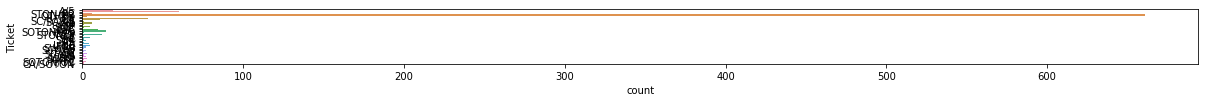

In [227]:
plot_count(ticket_type)

Too many categories. Might want to dedicate a separate notebook for extracting good features

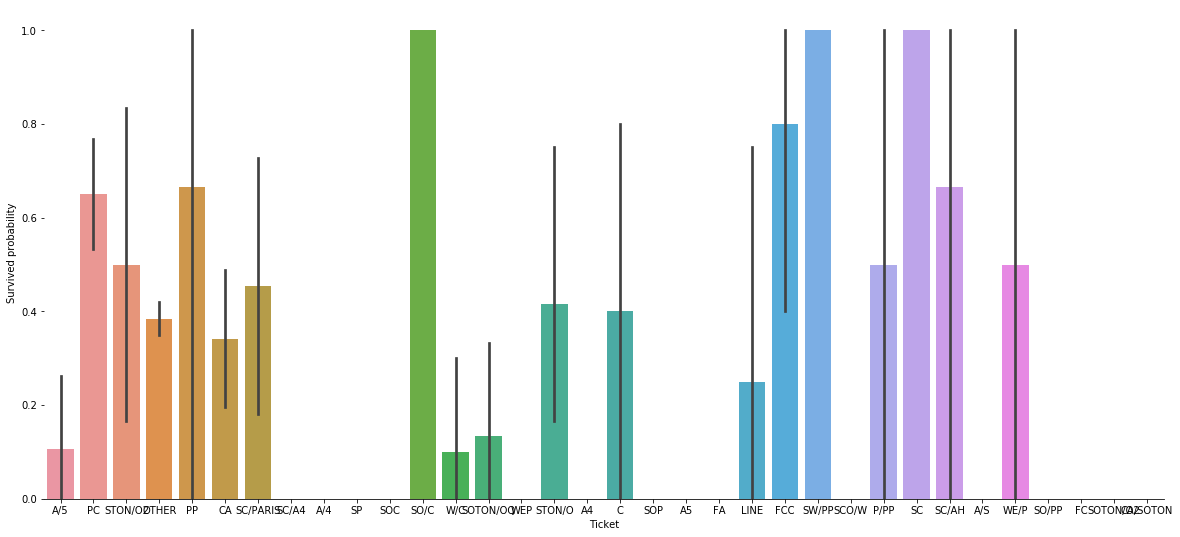

In [232]:
g = plot_prob(ticket_type, df.Survived)
g.fig.set_size_inches(20, 8)